#**Decision Tree**



#### General Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets


#Load Dataset

In [2]:
iris = sklearn.datasets.load_iris()

# Code

### import libaries to train data

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

### import necassary libaries to report

In [47]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

### Split data as train and test data

In [23]:
X, y = iris.data, iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state= 10)

### The function that classify the data

In [48]:
def classification(depth):

  clf = tree.DecisionTreeClassifier(max_depth= depth)
  clf = clf.fit(X_train,y_train)
  return clf


### The function that analyzes and examines the model

In [67]:
def calculate_classification_report():
  y_pred = list()
  fig, axes = plt.subplots(5, 3, figsize=(20, 30))
  
  for i in range(0,5):
    y_pred.append(classification(i+1).predict(X_test))
    
    c_matrix = confusion_matrix(y_test, y_pred[i])
    c_matrix = ConfusionMatrixDisplay(c_matrix).plot(ax=axes[i,0])
    axes[i,0].title.set_text('Confusion Matrix Of Max-Depth ='+str(i+1))

    prec, recall, _ = precision_recall_curve(y_test, y_pred[i], pos_label=classification(i+1).classes_[1])
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axes[i,1])
    axes[i,1].title.set_text('Percision-Recall Graph Of Max-Depth ='+str(i+1))

    fpr, tpr, _ = roc_curve(y_test, y_pred[i], pos_label=classification(i+1).classes_[1])
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax= axes[i,2])
    axes[i,2].title.set_text('True Positive-False Positive Graph Of Max-Depth ='+str(i+1))
  
  fig.show()


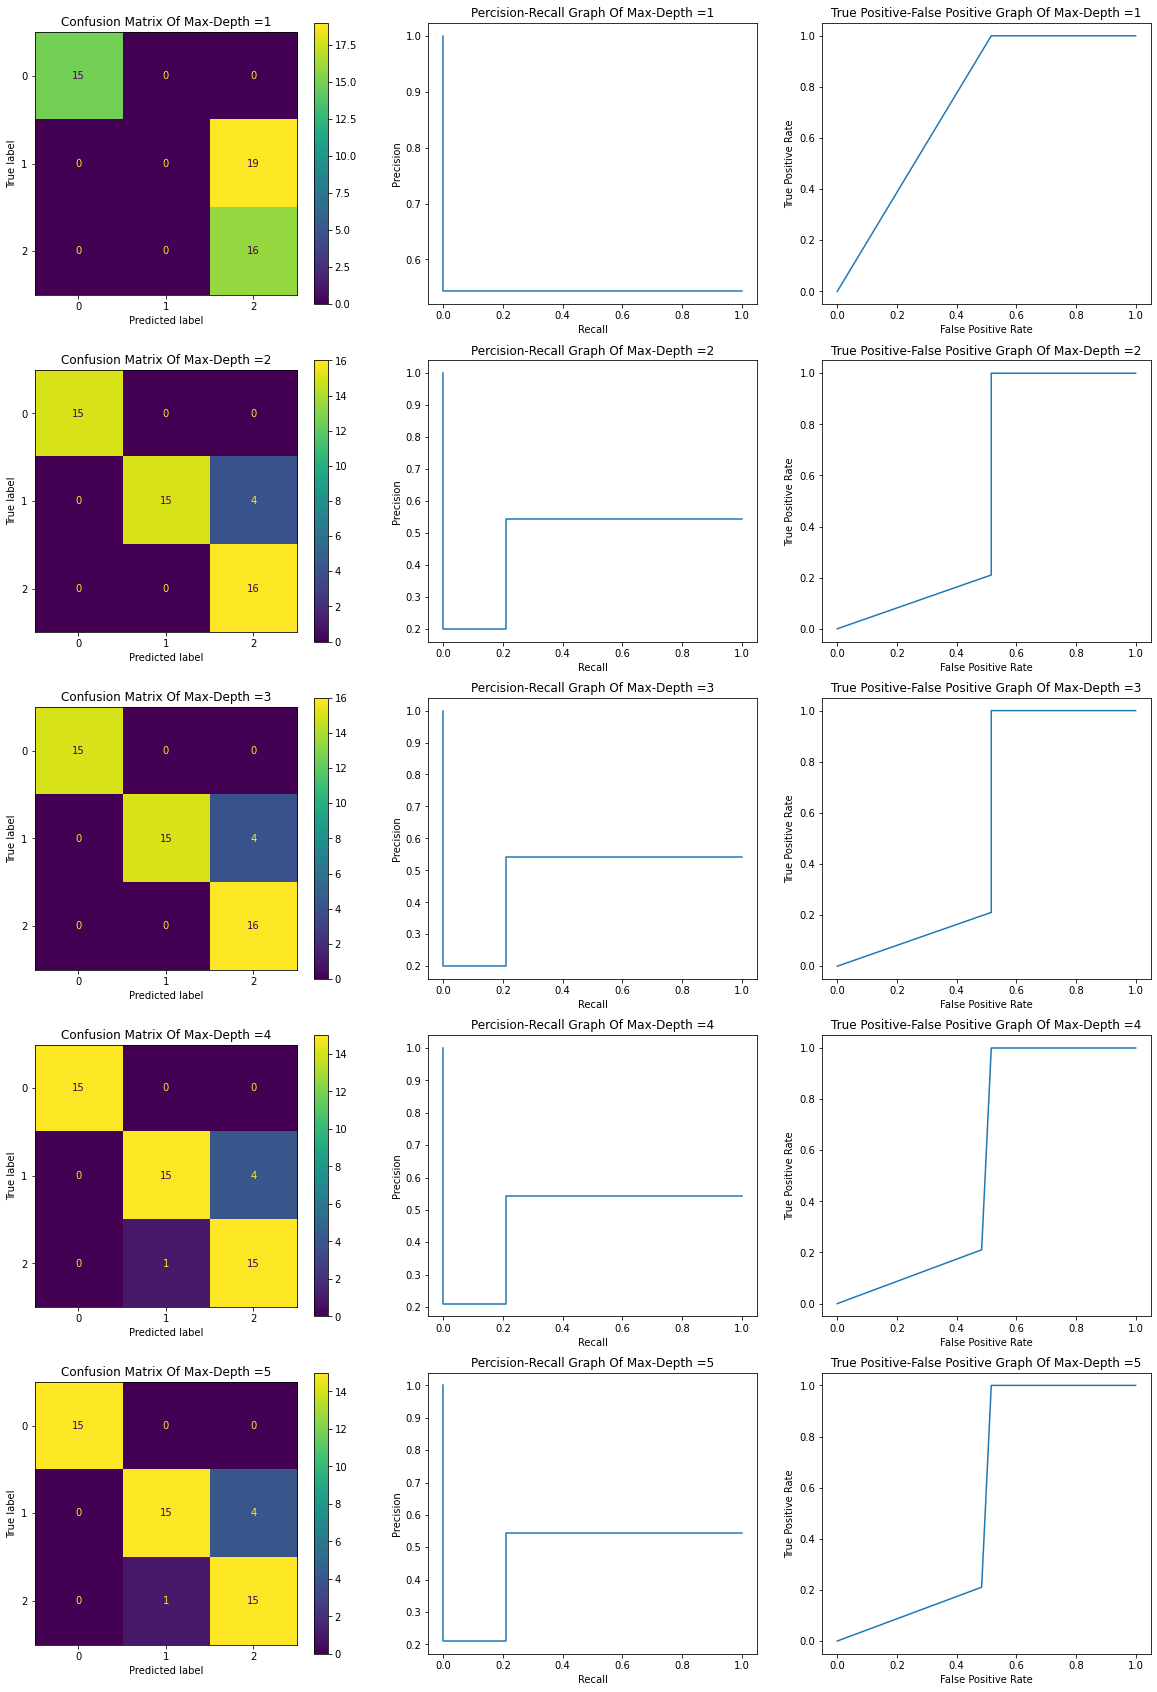

In [68]:
calculate_classification_report()

# Visualization Of Trees

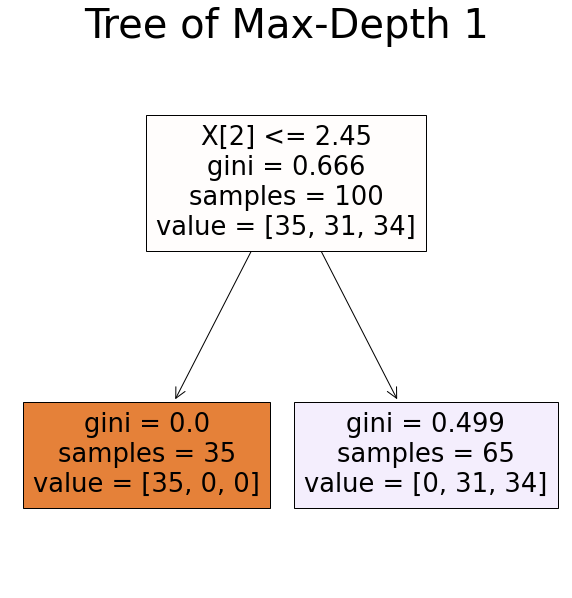

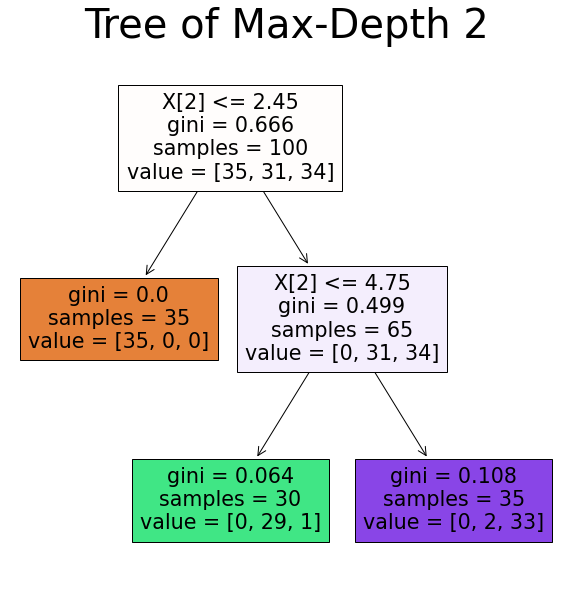

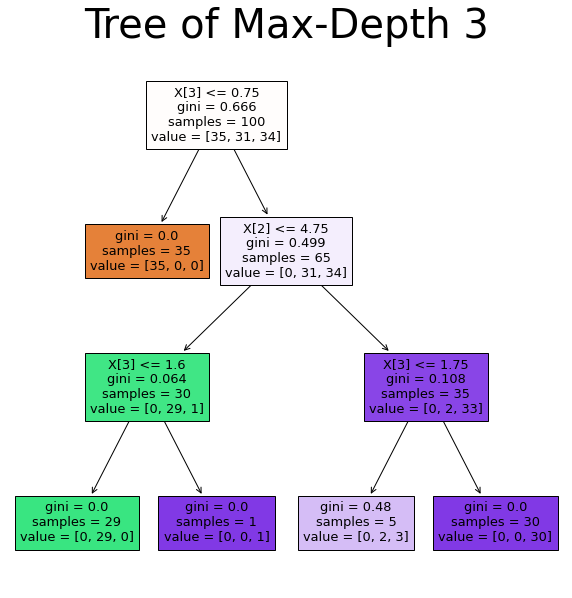

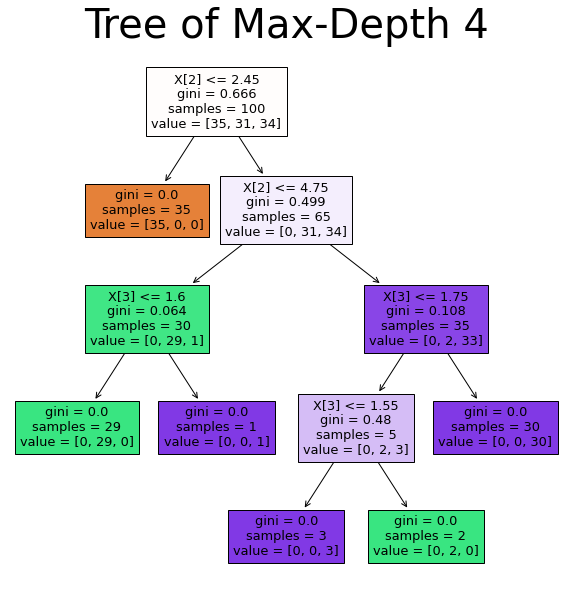

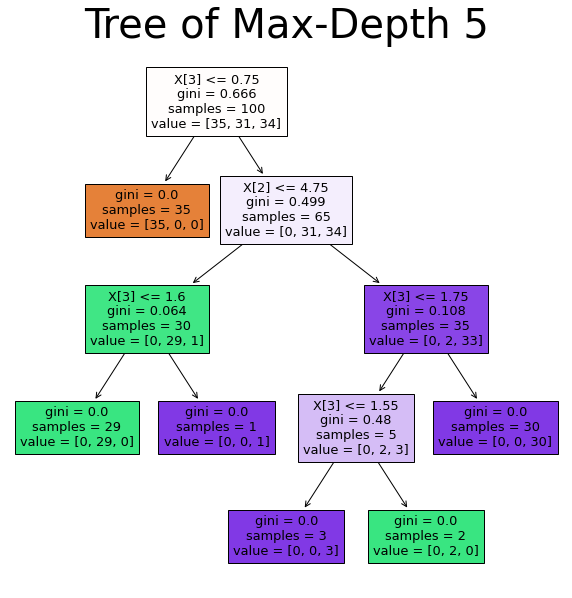

In [98]:
for i in range(0,5):
  fig, ax = plt.subplots(figsize=(10,10)) 
  tree.plot_tree(classification(i+1), filled=True, ax=ax)
  plt.title("Tree of Max-Depth "+str(i+1),fontsize = 40)
  plt.show()
